# 4 Dataset Classification

In [4]:
#Importing the libraries to watch the 'fits' image and get the data array
import astropy
#import plotly.graph_objects as go
from astropy.io import fits
#Importing a library that is useful to read the original file
import pandas as pd
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#Importing a visual library with some illustrative set up
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from matplotlib import cm
import numpy as np
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.decomposition import PCA
import math 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
#plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
plt.rcParams["axes.grid"] = False



In [5]:
#Importing the dataset
data=pd.read_csv('star.txt',sep='\s+')

In [6]:
#First five entries
data.head()

,#ID,X,Y,F606W,error,F814W,error.1,Chi,Sharp
0,8,4462.947,140.859,28.197,0.1036,27.127,0.1068,6.106,0.7310
1,120,5002.486,186.138,20.843,0.0552,19.815,0.0661,10.690,0.4000
2,165,5003.574,195.421,27.014,0.2194,26.068,0.1349,10.651,0.1940
3,226,4448.493,207.417,30.193,0.3641,28.270,0.1636,4.059,-1.9585
4,351,5040.717,224.366,28.935,0.1669,28.941,0.2464,4.274,-0.7720


In [7]:
#Dropping the target and the ID
notar=data.drop(columns=['Sharp','#ID'])

# P.C.A. Excluding Space

In [8]:
notar=data.drop(columns=['Sharp','#ID','X','Y'])

In [9]:
notar.head()

,F606W,error,F814W,error.1,Chi
0,28.197,0.1036,27.127,0.1068,6.106
1,20.843,0.0552,19.815,0.0661,10.690
2,27.014,0.2194,26.068,0.1349,10.651
3,30.193,0.3641,28.270,0.1636,4.059
4,28.935,0.1669,28.941,0.2464,4.274


In [10]:
#Applying P.C.A. to the non spatial features
pca=PCA(n_components=3)
pca=pca.fit(notar)
pca_data=pd.DataFrame(pca.transform(notar))

In [11]:
#Renaming them
pca_data=pca_data.rename(columns={0:'FirstComponent',1:'SecondComponent',2:'ThirdComponent'})

In [12]:
#Stacking together the spatial coordinates
pca_data['X']=data.X
pca_data['Y']=data.Y

In [13]:
#And the target
pca_data['Sharp']=data.Sharp

In [14]:
pca_data.head()

,FirstComponent,SecondComponent,ThirdComponent,X,Y,Sharp
0,-3.348246,3.558359,0.052565,4462.947,140.859,0.7310
1,6.885136,8.439184,0.189286,5002.486,186.138,0.4000
2,-1.896787,8.148357,0.145220,5003.574,195.421,0.1940
3,-5.504066,1.449171,-0.564914,4448.493,207.417,-1.9585
4,-5.110070,1.678896,0.804773,5040.717,224.366,-0.7720


# 2. Best method non linear

In [15]:
#SVM applied to the first two component 
opt_data=pca_data[['FirstComponent','SecondComponent']]

In [31]:
#Two target classification
#Taking the Sharp and considering only its sign
data['SharpSign']=np.sign(data.Sharp)

In [33]:
#As it is two class, the 0 values are set together with the positive ones.
data[data['SharpSign']==0].SharpSign=np.ones(len(data[data['SharpSign']==0]))

In [85]:
#Target set as dharp sign
opt_data['Target']=data.SharpSign

<ipython-input-85-60262cea00d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opt_data['Target']=data.SharpSign


In [74]:
#Dataset without target 
X=opt_data.drop(columns=['Target'])

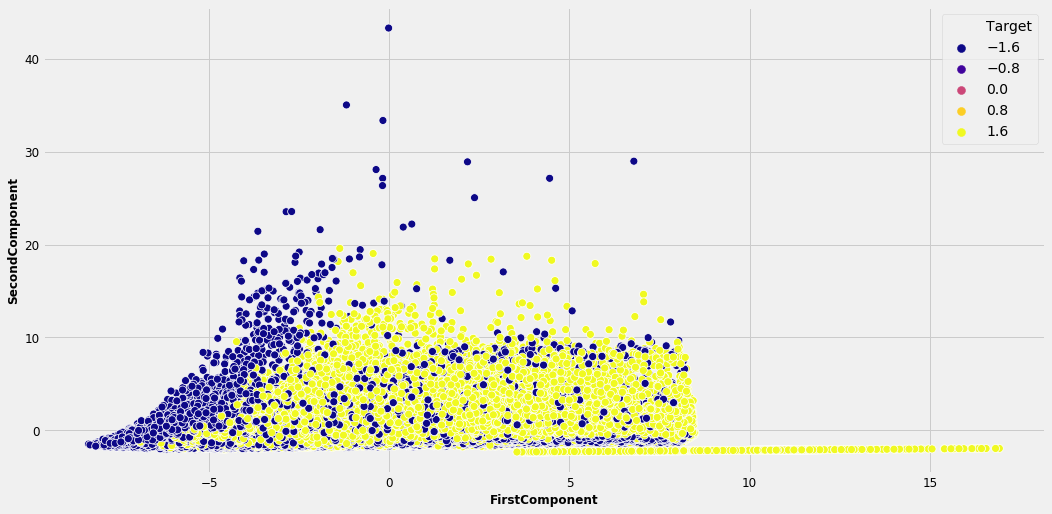

In [75]:
#Scatterplot of First and Second Component, together with the target
sns.scatterplot(opt_data.FirstComponent,opt_data.SecondComponent,hue=opt_data.Target,palette='plasma')
plt.grid(True)

In [78]:
#Importing sklearn libraries for SVC and model selection
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [87]:
#Considering the target y 
y=opt_data.Target

In [88]:
#Considering the train test split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [485]:
#Checking the best C value for SVM between 0 and 1 
c_list=np.arange(0.10,1.1,0.10)
k=0
FIN_SCORE=[]
for c in c_list:
    clf=SVC(C=c, kernel='rbf')
    clf.fit(X_train,y_train)
    fin_score=clf.score(X_test,y_test)
    FIN_SCORE.append(fin_score)
    
    if k==1:
        print('20% of the C values inspected')
    if k==4:
        print('50% of the C values inspected')
    if k==7:
        print ('80% of the C values inspected')
    if k == 9:
        print ('100% of the C values inspected \n')
        print ('Process completed')
    k=k+1

20% of the C values inspected
50% of the C values inspected
80% of the C values inspected
100% of the C values inspected 

Process completed


In [487]:
#Computing the accuracy
FIN_SCORE=np.array(FIN_SCORE)

In [488]:
#Checking the best C(best accuracy)
fin_score=FIN_SCORE.max()
i=FIN_SCORE.argmax()
c_max=c_list[i]

In [500]:
print ('The best classification is done between '+ str(c_list.min()) + ' and ' + str(c_list.max()) + '\n')
print('is ' + str(c_max) +', obtaining the following accuracy: '+str(fin_score*100)+'%')

The best classification is done between 0.1 and 1.0

is 0.8, obtaining the following accuracy: 71.88228438228438%


In [501]:
#Same process, but changing C between 1 and 10 
c_list=np.arange(1.,11,1.)
k=0
FIN_SCORE=[]
for c in c_list:
    clf=SVC(C=c, kernel='rbf')
    clf.fit(X_train,y_train)
    fin_score=clf.score(X_test,y_test)
    FIN_SCORE.append(fin_score)
    
    if k==1:
        print('20% of the C values inspected')
    if k==4:
        print('50% of the C values inspected')
    if k==7:
        print ('80% of the C values inspected')
    if k == 9:
        print ('100% of the C values inspected \n')
        print ('Process completed')
    k=k+1

20% of the C values inspected
50% of the C values inspected
80% of the C values inspected
100% of the C values inspected 

Process completed


In [504]:
FIN_SCORE=np.array(FIN_SCORE)
fin_score=FIN_SCORE.max()
i=FIN_SCORE.argmax()
c_max=c_list[i]
print ('The best classification is done between '+ str(c_list.min()) + ' and ' + str(c_list.max()) + '\n')
print('is ' + str(c_max) +', obtaining the following accuracy: '+str(fin_score*100)+'%')

The best classification is done between 1.0 and 10.0

is 2.0, obtaining the following accuracy: 71.95998445998445%


In [506]:
#Same process but changing C between 10 and 50
c_list=np.arange(10,60,10)
k=0
FIN_SCORE=[]
for c in c_list:
    clf=SVC(C=c, kernel='rbf')
    clf.fit(X_train,y_train)
    fin_score=clf.score(X_test,y_test)
    FIN_SCORE.append(fin_score)
    if k==0:
        print('20% of the C values inspected')
    if k==1:
        print('40% of the C values inspected')
    if k==2:
        print('60% of the C values inspected')
    if k==3:
        print('80% of the C values inspected')
    if k==4:
        print('100% of the C values inspected')
    k=k+1

20% of the C values inspected
40% of the C values inspected
60% of the C values inspected
80% of the C values inspected
100% of the C values inspected


In [508]:
FIN_SCORE=np.array(FIN_SCORE)
fin_score=FIN_SCORE.max()
i=FIN_SCORE.argmax()
c_max=c_list[i]
print ('The best classification is done between '+ str(c_list.min()) + ' and ' + str(c_list.max()) + '\n')
print('is ' + str(c_max) +', obtaining the following accuracy: '+str(fin_score*100)+'%')

The best classification is done between 10 and 50

is 20, obtaining the following accuracy: 71.86285936285937%


In [510]:
#Same process between 100 and 500
c_list=np.arange(100,600,100)
k=0
FIN_SCORE=[]
for c in c_list:
    clf=SVC(C=c, kernel='rbf')
    clf.fit(X_train,y_train)
    fin_score=clf.score(X_test,y_test)
    FIN_SCORE.append(fin_score)
    if k==0:
        print('20% of the C values inspected \n')
    if k==1:
        print('40% of the C values inspected \n')
    if k==2:
        print('60% of the C values inspected \n')
    if k==3:
        print('80% of the C values inspected \n')
    if k==4:
        print('100% of the C values inspected \n')
        print ('Process completed')
    k=k+1

20% of the C values inspected 

40% of the C values inspected 

60% of the C values inspected 

80% of the C values inspected 

100% of the C values inspected 

Process completed


In [512]:
FIN_SCORE=np.array(FIN_SCORE)
fin_score=FIN_SCORE.max()
i=FIN_SCORE.argmax()
c_max=c_list[i]
print ('The best classification is done between '+ str(c_list.min()) + ' and ' + str(c_list.max()) + '\n')
print('is ' + str(c_max) +', obtaining the following accuracy: '+str(fin_score*100)+'%')

The best classification is done between 100 and 500

is 300, obtaining the following accuracy: 71.95027195027195%


In [513]:
#Same process with C=1000
clf=SVC(C=1000, kernel='rbf')
clf.fit(X_train,y_train)
fin_score=clf.score(X_test,y_test)

In [516]:
print('The score for C=1000 is ' +str(fin_score*100) +'%')

The score for C=1000 is 72.03768453768454%


In [517]:
#And C=10000
clf=SVC(C=10000, kernel='rbf')
clf.fit(X_train,y_train)
fin_score=clf.score(X_test,y_test)

In [518]:
print('The score for C=10000 is ' +str(fin_score*100) +'%')

The score for C=10000 is 72.21250971250971%


In [90]:
#And C=1000000
clf=SVC(C=100000, kernel='rbf')
clf.fit(X_train,y_train)
fin_score=clf.score(X_test,y_test)

In [91]:
#The best one is the last one, with 72%+ of accuracy
print('The score for C=100000 is ' +str(fin_score*100) +'% \n')
print ('SVM best score: 72.2%')

The score for C=100000 is 72.21250971250971% 

SVM best score: 72.2%


In [92]:
#Prediction computed on the test set 
pred=clf.predict(X_test)

In [93]:
#Target and Prediction comparison displayed 
pred_data=pd.DataFrame()
pred_data['FirstComponent']= X_test['FirstComponent']
pred_data['SecondComponent']=X_test['SecondComponent']
pred_data['Target']=y_test
pred_data['Prediction']=pred

In [94]:
pred_data.head()

,FirstComponent,SecondComponent,Target,Prediction
44808,-2.258918,2.654765,1.0,1.0
18329,-4.022375,1.007576,1.0,1.0
17644,-1.415441,-1.475861,1.0,1.0
32773,7.309769,-1.278639,1.0,-1.0
4139,0.761960,-0.158196,1.0,1.0


In [95]:
pred_data.to_csv('SVMprediction.csv')

Text(0, 0.5, 'Second Component')

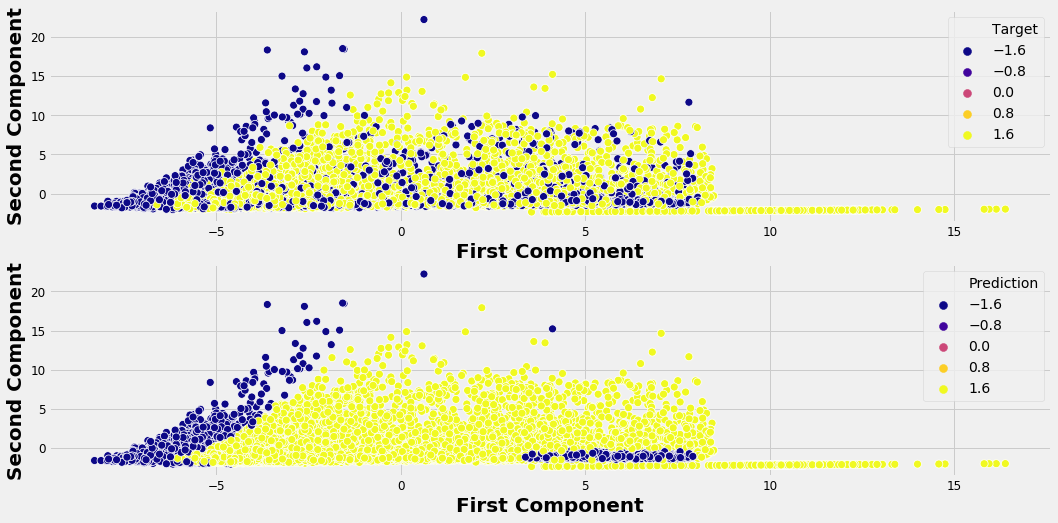

In [541]:
#Subplot of the prediction and the real target
plt.subplot(2,1,1)
sns.scatterplot(pred_data.FirstComponent,pred_data.SecondComponent,hue=pred_data.Target,palette='plasma')
plt.grid(True)
plt.xlabel('First Component',fontsize=20)
plt.ylabel('Second Component',fontsize=20)
plt.subplot(2,1,2)
sns.scatterplot(pred_data.FirstComponent,pred_data.SecondComponent,hue=pred_data.Prediction,palette='plasma')
plt.grid(True)
plt.xlabel('First Component',fontsize=20)
plt.ylabel('Second Component',fontsize=20)

<ipython-input-111-fdedc844d781>:7: UserWarning: The following kwargs were not used by contour: 'linetypes'
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,


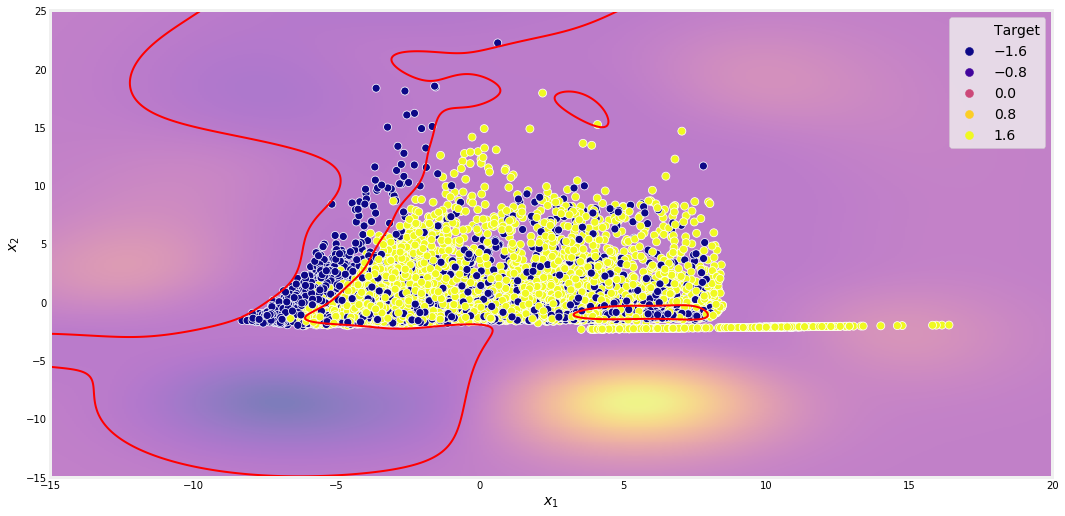

In [111]:
#Decision boundary plot 
import matplotlib.cm as cm
xx, yy = np.meshgrid(np.linspace(-15, 20, 500),
                     np.linspace(-15, 25, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(16,8))
fig.patch.set_facecolor('white')
ax = fig.gca()
imshow_handle = plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', alpha=.5, cmap='plasma')
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linetypes='--', colors='red')
sns.scatterplot(pred_data.FirstComponent,pred_data.SecondComponent,hue=pred_data.Target,palette='plasma')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.xlim(-3, 3)
#plt.ylim(-3, 3)
plt.legend()
plt.show()